In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [21]:
# loading our dataframes

math = pd.read_csv('../../data/raw/student-mat.csv', delimiter=';')

In [22]:
#Gather descriptive stats on MAth class dataframe
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [23]:
# names may be verbose but I find them more descriptive
column_map = {
    "Pstatus": "parent_cohabitation_status",
    "Medu": "mother's_edu",
    "Fedu": "father's_edu",
    "Fjob": "father's_job",
    "Mjob": "mother's_job",
    "reason": "reason_to_choose_school",
    "schoolsup": "extra_edu_support",
    "famsup": "family_edu_support",
    "paid":"extra_paid_classes",
    "activites": "extra_cirricular_activites",
    "nursery": "attended_nursery",
    "higher": "interested_in_higher_edu",
    "internet": "internet_access",
    "romantic": "in_romantic_relationship",
    "famrel": "quality_of_fam_time",
    "freetime": "free_time_after_school",
    "goout": "goes_out_with_friends",
    "Dalc": "daily_alcohol_consumption",
    "Walc": "weekend_alcohol_consumption",
    "health": "current_health_status",
    "G1": "first_grade_period",
    "G2": "second_grade_period",
    "G3": "final_grade"
}

math = math.rename(columns=column_map)
math.head()

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [24]:
math.head()

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize',
       'parent_cohabitation_status', 'mother's_edu', 'father's_edu',
       'mother's_job', 'father's_job', 'reason_to_choose_school', 'guardian',
       'traveltime', 'studytime', 'failures', 'extra_edu_support',
       'family_edu_support', 'extra_paid_classes', 'activities',
       'attended_nursery', 'interested_in_higher_edu', 'internet_access',
       'in_romantic_relationship', 'quality_of_fam_time',
       'free_time_after_school', 'goes_out_with_friends',
       'daily_alcohol_consumption', 'weekend_alcohol_consumption',
       'current_health_status', 'absences', 'first_grade_period',
       'second_grade_period', 'final_grade'],
      dtype='object')

(array([ 2., 31., 37., 72., 51., 74., 63., 24., 30., 11.]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ]),
 <BarContainer object of 10 artists>)

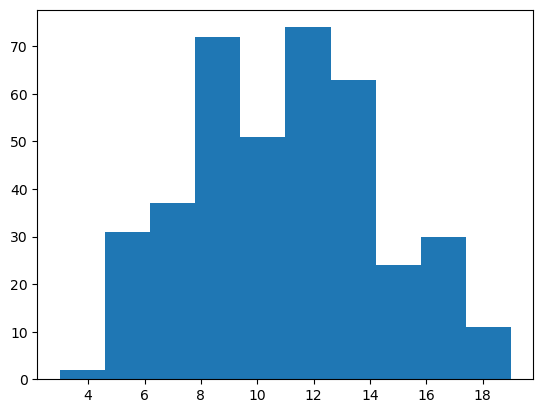

In [26]:
#Histogram for 1st period grades of Math class
plt.hist(math['first_grade_period'])

(array([13.,  0., 16., 35., 82., 81., 78., 57., 18., 15.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

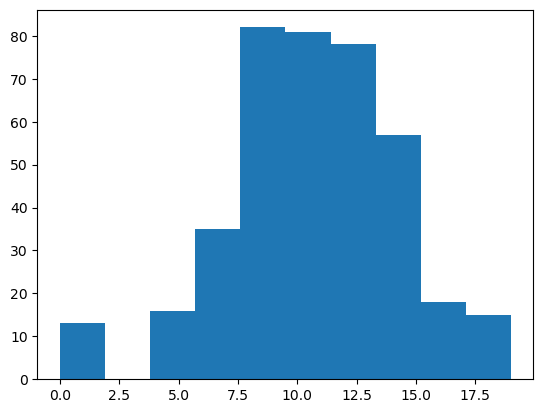

In [27]:
#Histogram for 2nd period grades of Math class
plt.hist(math['second_grade_period'])

(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

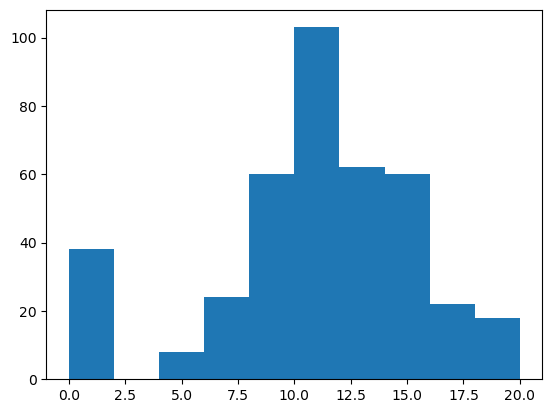

In [28]:
#Histogram for 3rd period grades of Math class
plt.hist(math['final_grade'])

In [29]:
#Get value counts of internet column
internet_access_m = math.value_counts('internet_access')
internet_access_m

internet_access
yes    329
no      66
Name: count, dtype: int64

<Axes: xlabel='internet_access'>

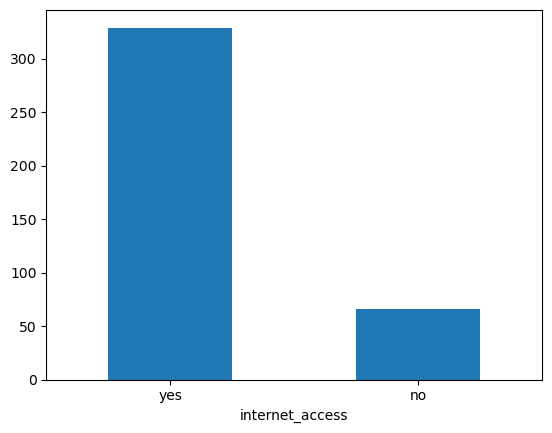

In [30]:
#Bar chart of students with internet access in Math class
internet_access_m.plot.bar(rot=0)

<Axes: xlabel='internet_access', ylabel='first_grade_period'>

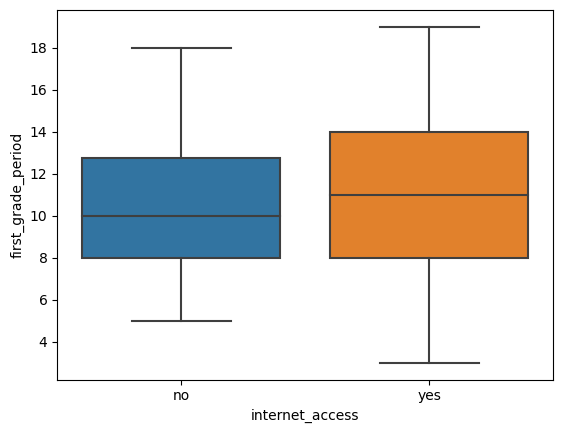

In [31]:
#Boxplot comparing internet access and 1st period grades
sns.boxplot(data=math, x='internet_access', y='first_grade_period')

<Axes: xlabel='internet_access', ylabel='second_grade_period'>

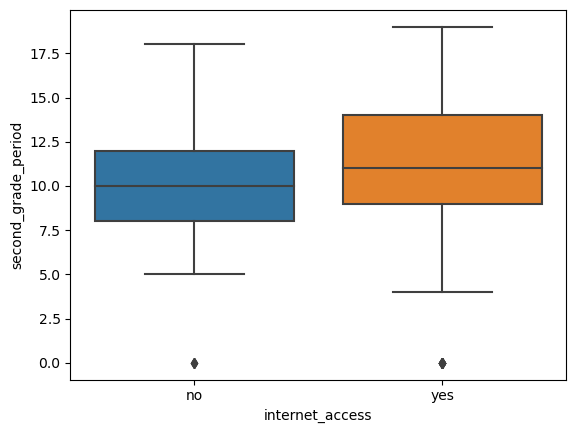

In [32]:
#Boxplot comparing internet access and 2nd period grades
sns.boxplot(data=math, x='internet_access', y='second_grade_period')

<Axes: xlabel='internet_access', ylabel='final_grade'>

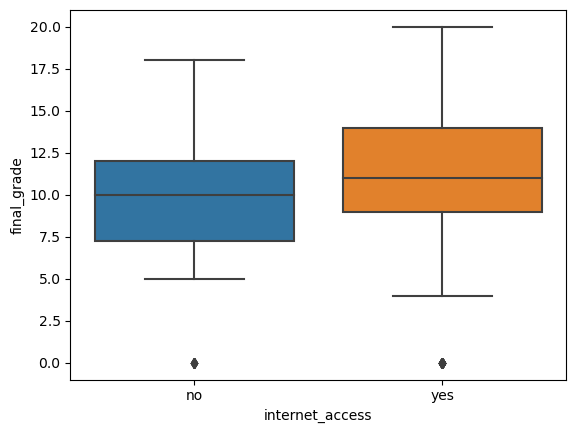

In [33]:
#Boxplot comparing internet access and 3rd period grades

sns.boxplot(data=math, x='internet_access', y='final_grade')

### Relationships with Target Variable (final grade)

In [34]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize',
       'parent_cohabitation_status', 'mother's_edu', 'father's_edu',
       'mother's_job', 'father's_job', 'reason_to_choose_school', 'guardian',
       'traveltime', 'studytime', 'failures', 'extra_edu_support',
       'family_edu_support', 'extra_paid_classes', 'activities',
       'attended_nursery', 'interested_in_higher_edu', 'internet_access',
       'in_romantic_relationship', 'quality_of_fam_time',
       'free_time_after_school', 'goes_out_with_friends',
       'daily_alcohol_consumption', 'weekend_alcohol_consumption',
       'current_health_status', 'absences', 'first_grade_period',
       'second_grade_period', 'final_grade'],
      dtype='object')

<Axes: xlabel='school', ylabel='final_grade'>

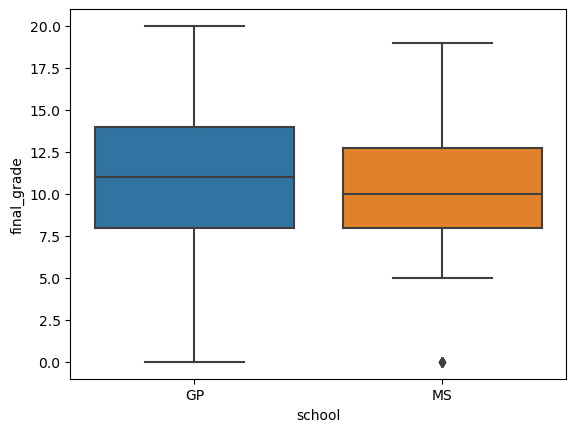

In [35]:
sns.boxplot(data=math, x='school', y='final_grade')

<Axes: xlabel='sex', ylabel='final_grade'>

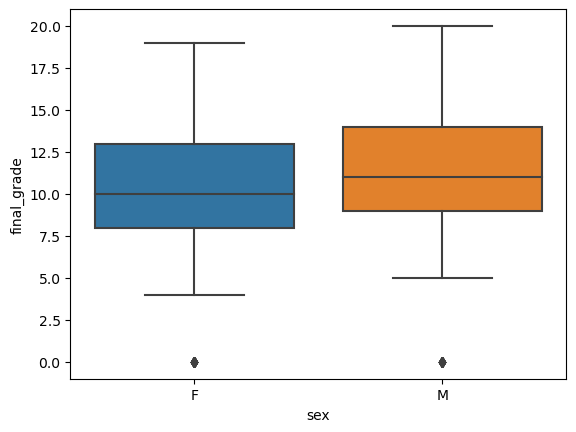

In [36]:
sns.boxplot(data=math, x='sex', y='final_grade')

<Axes: xlabel='age', ylabel='final_grade'>

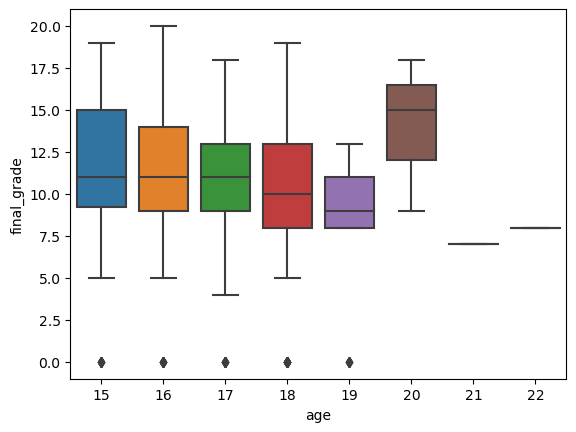

In [37]:
sns.boxplot(data=math, x='age', y='final_grade')

<Axes: xlabel='address', ylabel='final_grade'>

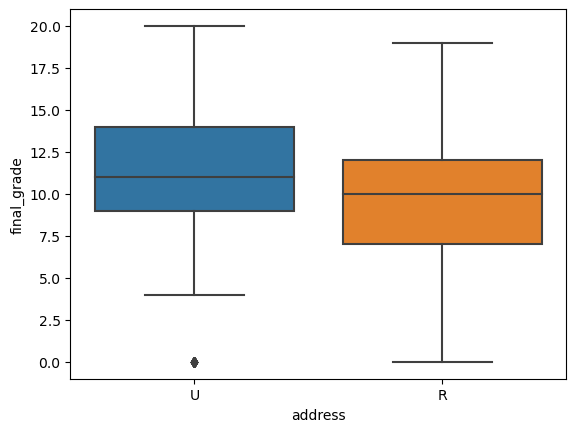

In [38]:
sns.boxplot(data=math, x='address', y='final_grade')

<Axes: xlabel='famsize', ylabel='final_grade'>

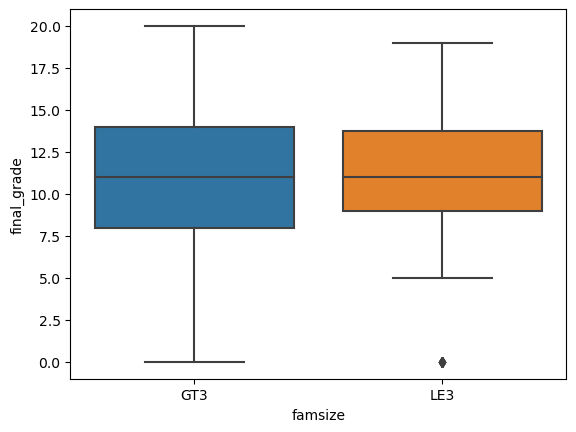

In [39]:
sns.boxplot(data=math, x='famsize', y='final_grade')

<Axes: xlabel='parent_cohabitation_status', ylabel='final_grade'>

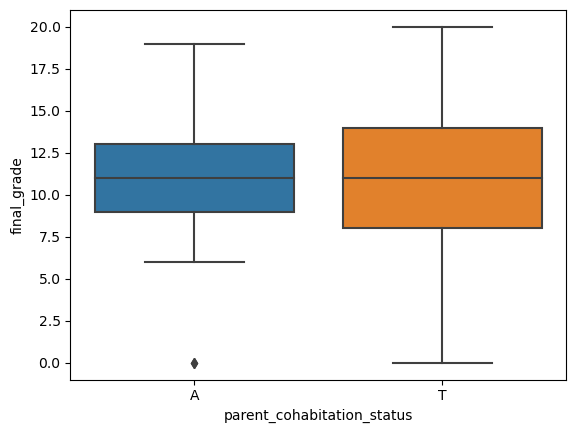

In [40]:
sns.boxplot(data=math, x='parent_cohabitation_status', y='final_grade')

<Axes: xlabel="mother's_edu", ylabel='final_grade'>

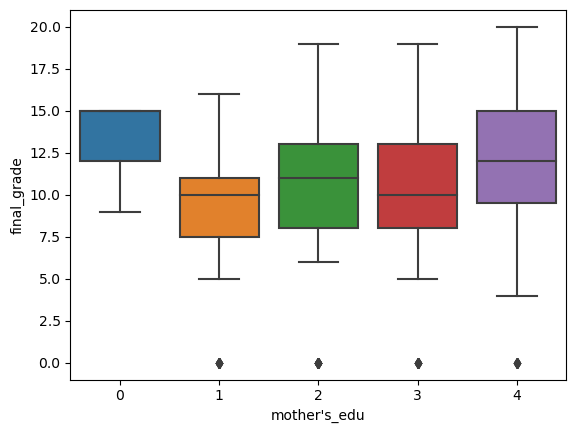

In [41]:
sns.boxplot(data=math, x="mother's_edu", y='final_grade')

<Axes: xlabel="father's_edu", ylabel='final_grade'>

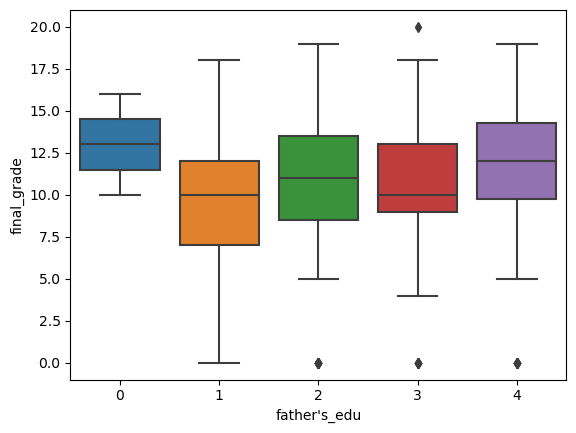

In [42]:
sns.boxplot(data=math, x="father's_edu", y='final_grade')

<Axes: xlabel="mother's_job", ylabel='final_grade'>

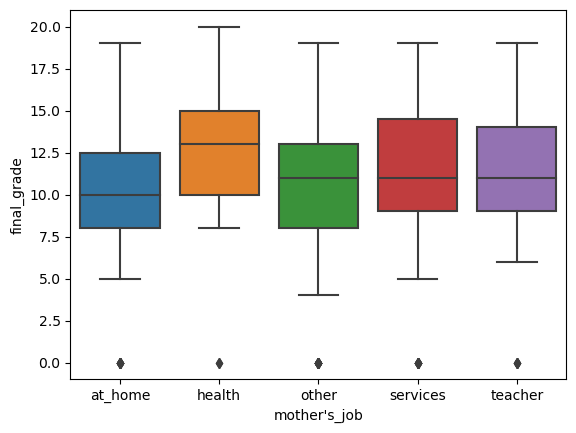

In [43]:
sns.boxplot(data=math, x="mother's_job", y='final_grade')

<Axes: xlabel="father's_job", ylabel='final_grade'>

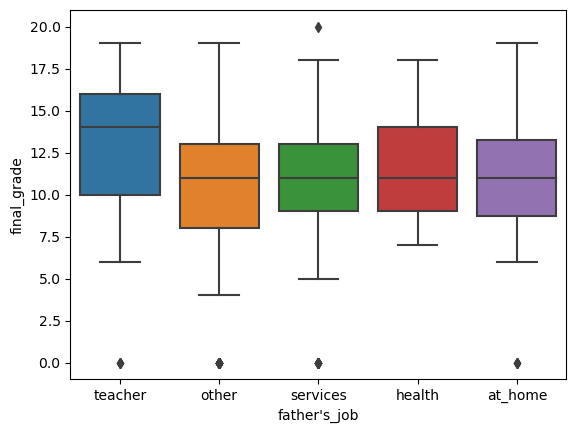

In [44]:
sns.boxplot(data=math, x="father's_job", y='final_grade')

<Axes: xlabel='reason_to_choose_school', ylabel='final_grade'>

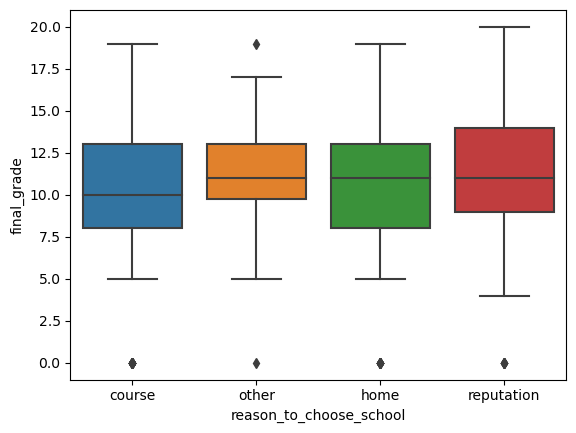

In [45]:
sns.boxplot(data=math, x="reason_to_choose_school", y='final_grade')

<Axes: xlabel='guardian', ylabel='final_grade'>

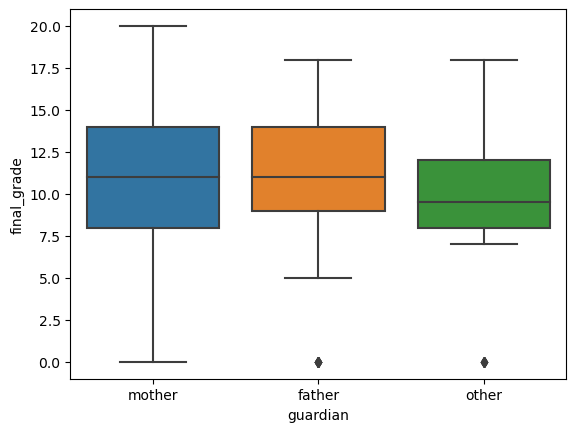

In [46]:
sns.boxplot(data=math, x="guardian", y='final_grade')

<Axes: xlabel='traveltime', ylabel='final_grade'>

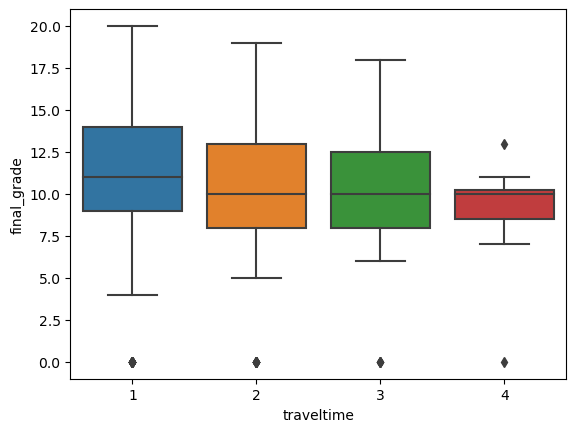

In [47]:
sns.boxplot(data=math, x="traveltime", y='final_grade')

<Axes: xlabel='studytime', ylabel='final_grade'>

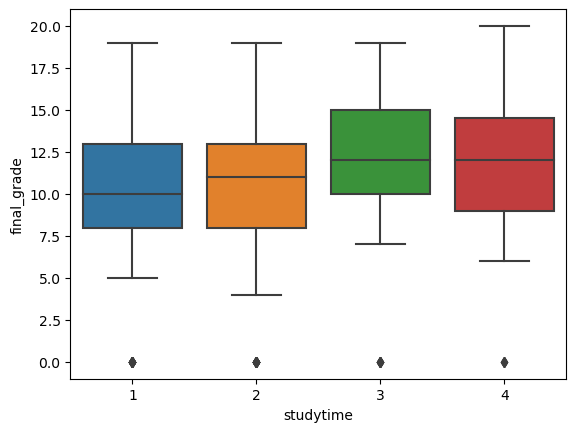

In [48]:
sns.boxplot(data=math, x="studytime", y='final_grade')

<Axes: xlabel='failures', ylabel='final_grade'>

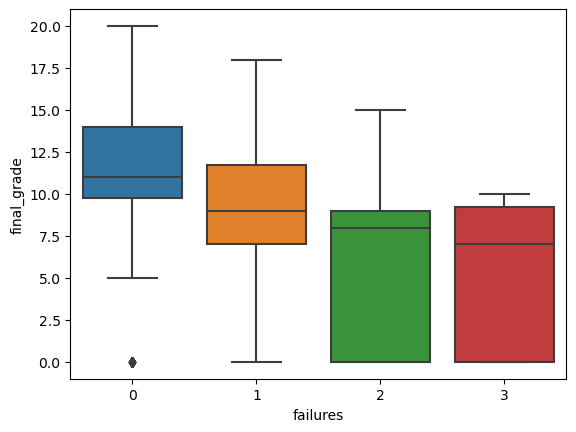

In [49]:
sns.boxplot(data=math, x="failures", y='final_grade')

<Axes: xlabel='extra_edu_support', ylabel='final_grade'>

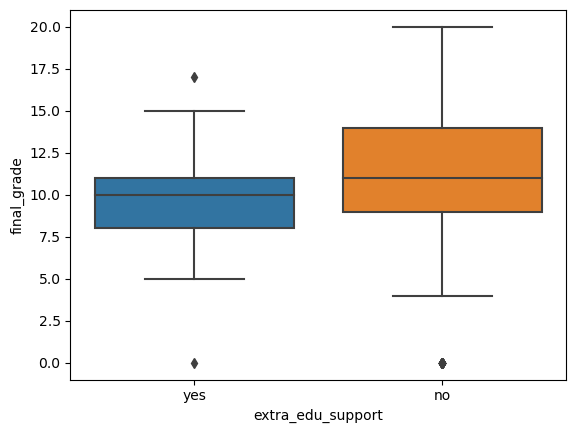

In [50]:
sns.boxplot(data=math, x="extra_edu_support", y='final_grade')

<Axes: xlabel='extra_paid_classes', ylabel='final_grade'>

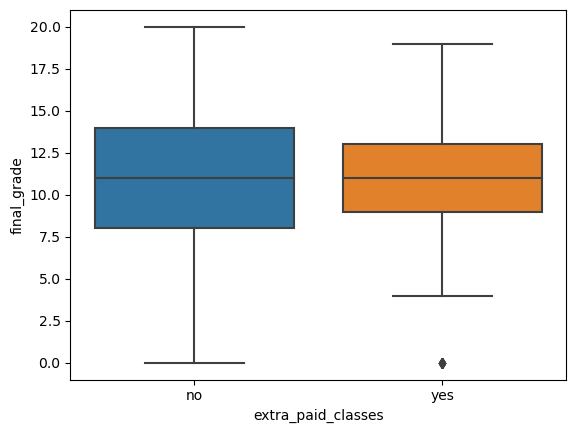

In [51]:
sns.boxplot(data=math, x="extra_paid_classes", y='final_grade')

<Axes: xlabel='activities', ylabel='final_grade'>

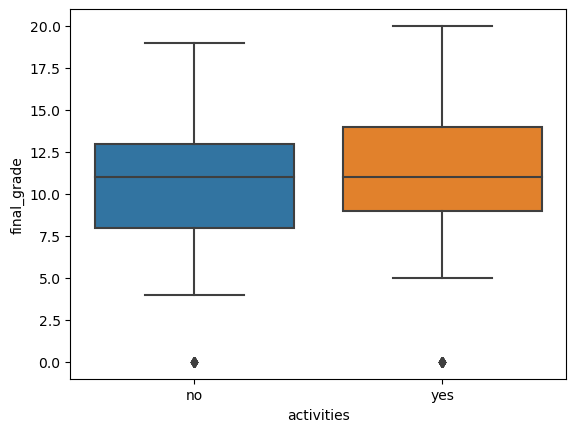

In [52]:
sns.boxplot(data=math, x="activities", y='final_grade')

<Axes: xlabel='attended_nursery', ylabel='final_grade'>

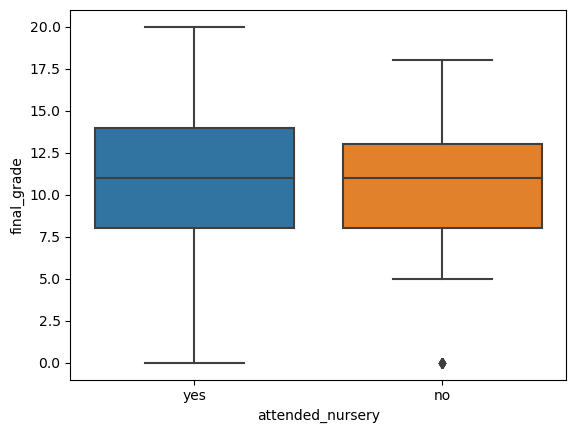

In [53]:
sns.boxplot(data=math, x="attended_nursery", y='final_grade')

<Axes: xlabel='interested_in_higher_edu', ylabel='final_grade'>

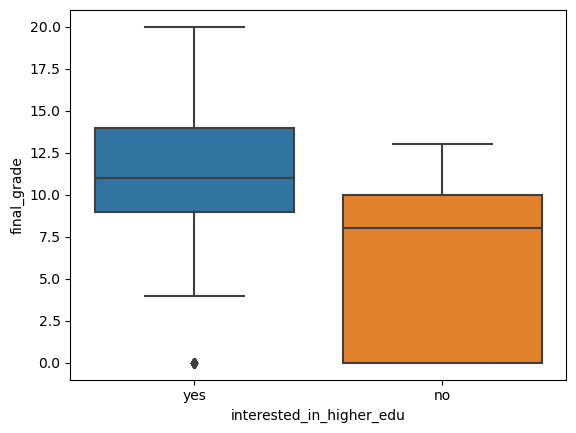

In [54]:
sns.boxplot(data=math, x="interested_in_higher_edu", y='final_grade')

<Axes: xlabel='internet_access', ylabel='final_grade'>

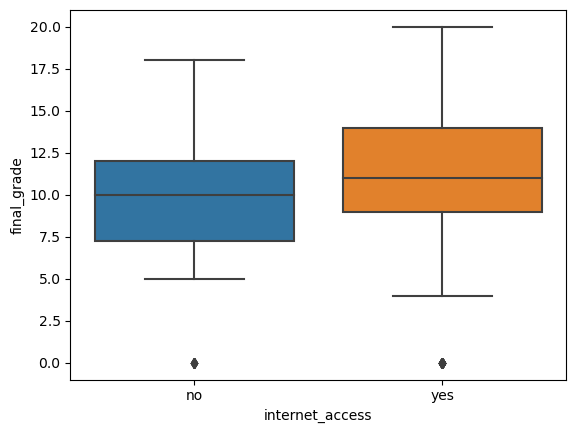

In [55]:
sns.boxplot(data=math, x="internet_access", y='final_grade')

<Axes: xlabel='in_romantic_relationship', ylabel='final_grade'>

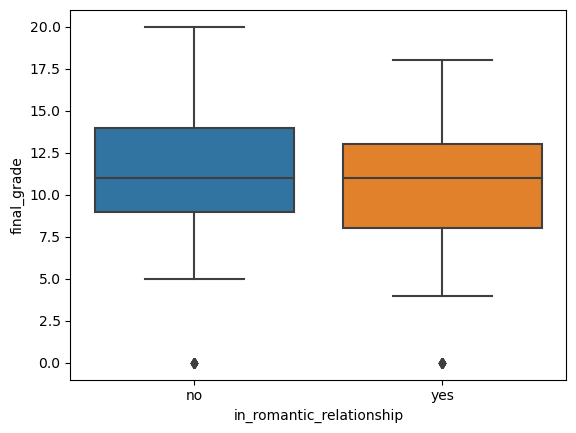

In [56]:
sns.boxplot(data=math, x="in_romantic_relationship", y='final_grade')

<Axes: xlabel='quality_of_fam_time', ylabel='final_grade'>

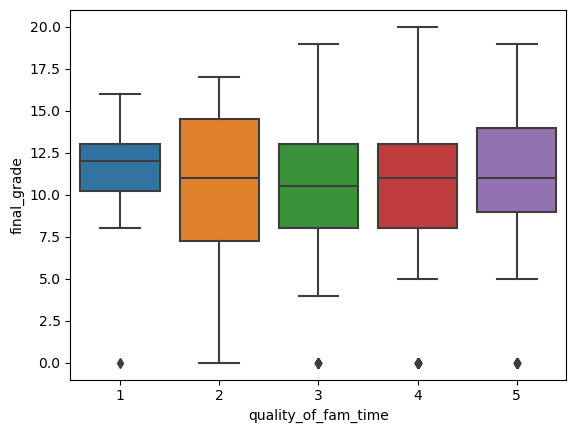

In [57]:
sns.boxplot(data=math, x="quality_of_fam_time", y='final_grade')

<Axes: xlabel='free_time_after_school', ylabel='final_grade'>

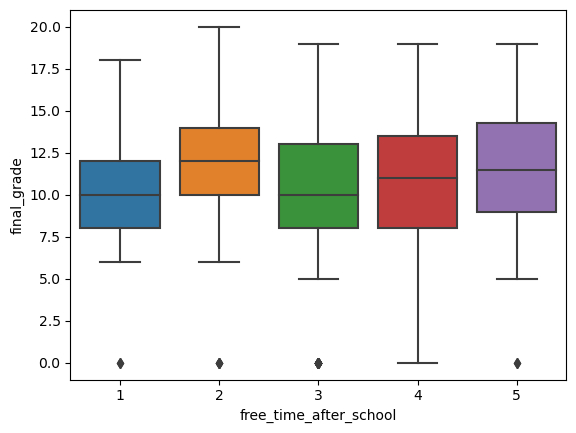

In [58]:
sns.boxplot(data=math, x="free_time_after_school", y='final_grade')

<Axes: xlabel='goes_out_with_friends', ylabel='final_grade'>

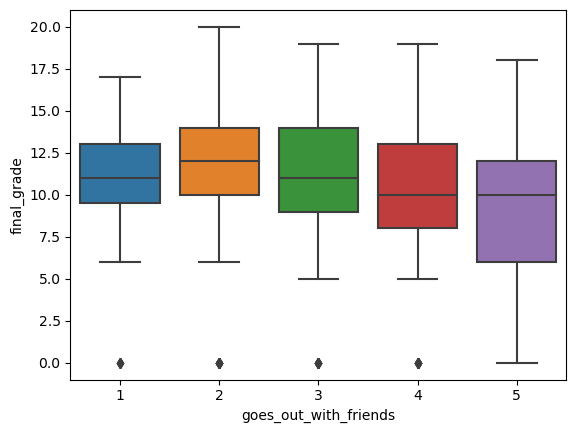

In [59]:
sns.boxplot(data=math, x="goes_out_with_friends", y='final_grade')

<Axes: xlabel='daily_alcohol_consumption', ylabel='final_grade'>

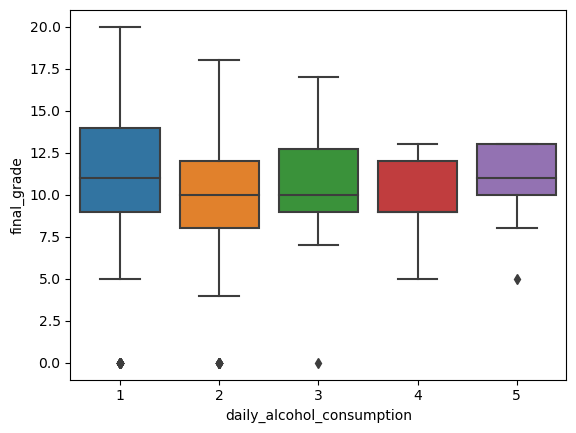

In [60]:
sns.boxplot(data=math, x="daily_alcohol_consumption", y='final_grade')

<Axes: xlabel='weekend_alcohol_consumption', ylabel='final_grade'>

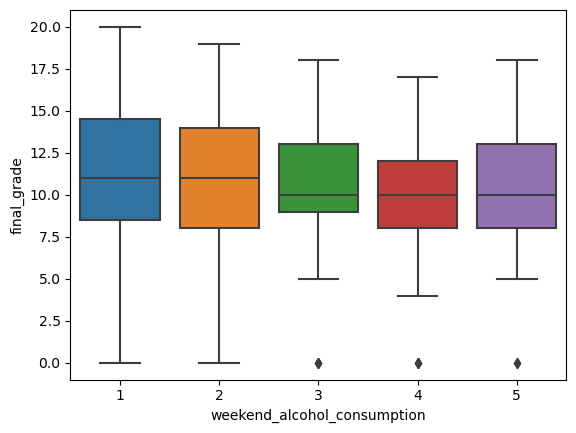

In [61]:
sns.boxplot(data=math, x="weekend_alcohol_consumption", y='final_grade')

<Axes: xlabel='current_health_status', ylabel='final_grade'>

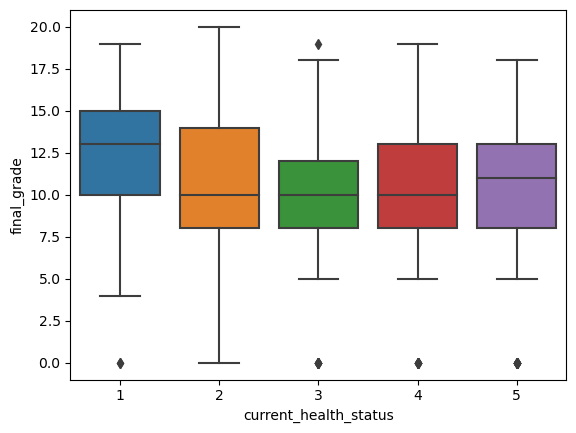

In [62]:
sns.boxplot(data=math, x="current_health_status", y='final_grade')

<Axes: xlabel='absences', ylabel='final_grade'>

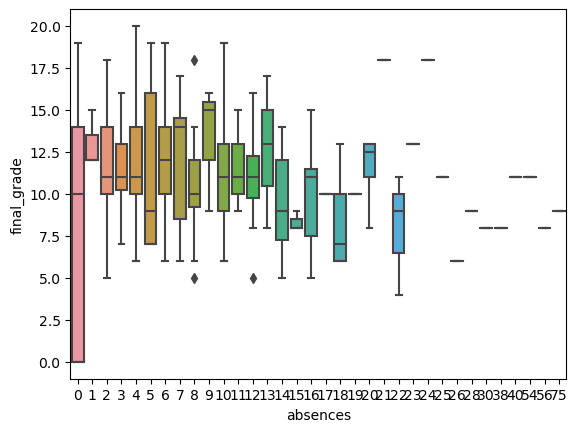

In [63]:
sns.boxplot(data=math, x="absences", y='final_grade')

<Axes: xlabel='first_grade_period', ylabel='final_grade'>

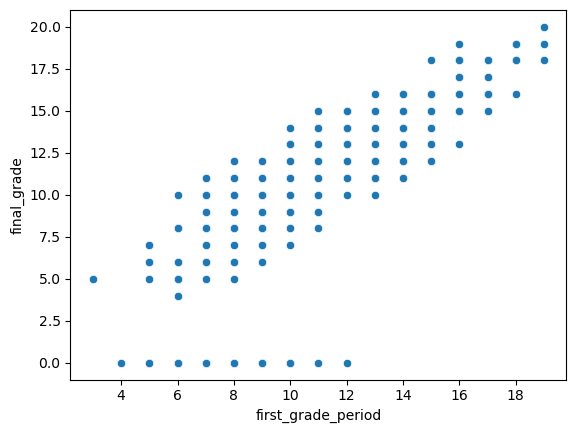

In [64]:
sns.scatterplot(data=math, x="first_grade_period", y='final_grade')

<Axes: xlabel='second_grade_period', ylabel='final_grade'>

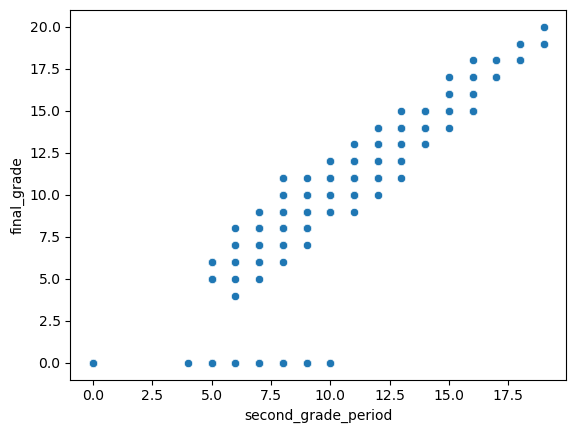

In [65]:
sns.scatterplot(data=math, x="second_grade_period", y='final_grade')